In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [142]:
df=pd.read_csv("train_.csv")
df2=pd.read_csv("test_.csv")

In [143]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
df[df["CoapplicantIncome"]==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [145]:
df[df["LoanAmount"]==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [147]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [148]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [149]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [150]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [151]:
df2["Gender"].fillna(df2["Gender"].mode()[0],inplace=True)
df2["Married"].fillna(df2["Married"].mode()[0],inplace=True)
df2["Dependents"].fillna(df2["Dependents"].mode()[0],inplace=True)
df2["Self_Employed"].fillna(df2["Self_Employed"].mode()[0],inplace=True)
df2["LoanAmount"].fillna(df2["LoanAmount"].median(),inplace=True)
df2["Loan_Amount_Term"].fillna(df2["Loan_Amount_Term"].mode()[0],inplace=True)
df2["Credit_History"].fillna(df2["Credit_History"].mode()[0],inplace=True)

In [152]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

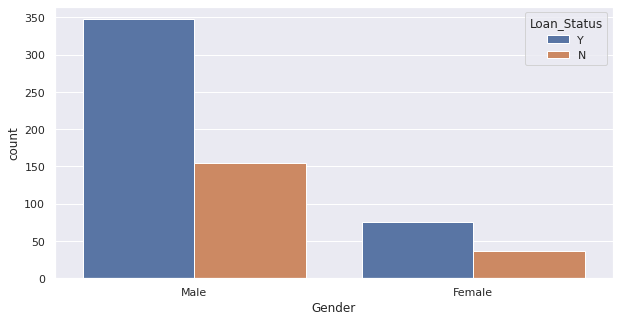

In [153]:
plt.figure(figsize=(10,5))
sns.countplot(x="Gender",data=df,hue="Loan_Status")
plt.show()

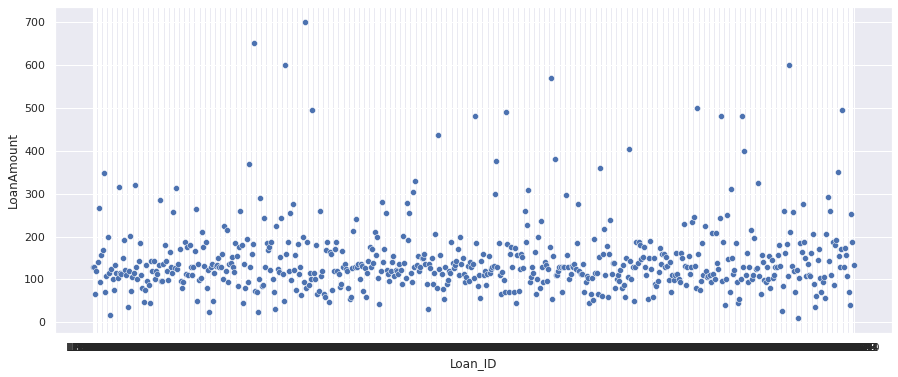

In [154]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Loan_ID",y="LoanAmount",data=df);

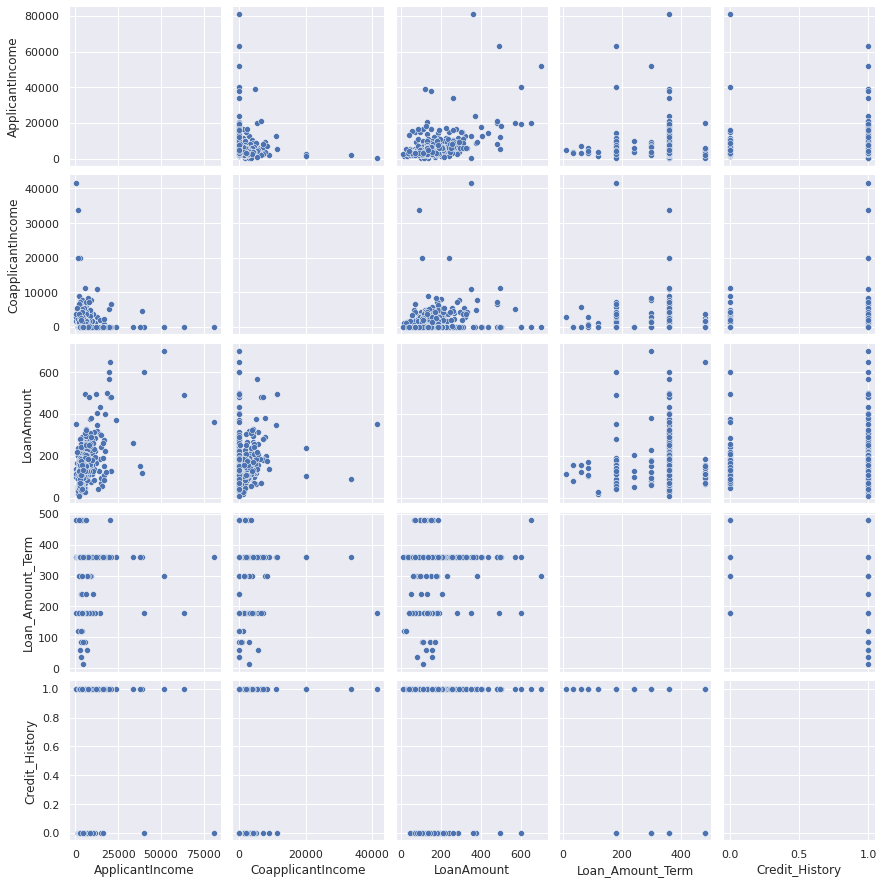

In [119]:
sns.pairplot(df,diag_kind="hue")

In [155]:
df.drop(columns="CoapplicantIncome",inplace=True)

In [156]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [157]:
cat_cols=pd.get_dummies(df[["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]])
df=pd.concat([cat_cols,df.drop(["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],axis=1)],axis=1)
df

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,LP001002,5849,128.0,360.0,1.0,Y
1,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,LP001003,4583,128.0,360.0,1.0,N
2,0,1,0,1,1,0,0,0,1,0,...,1,0,0,1,LP001005,3000,66.0,360.0,1.0,Y
3,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,LP001006,2583,120.0,360.0,1.0,Y
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,LP001008,6000,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,LP002978,2900,71.0,360.0,1.0,Y
610,0,1,0,1,0,0,0,1,1,0,...,0,1,0,0,LP002979,4106,40.0,180.0,1.0,Y
611,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,LP002983,8072,253.0,360.0,1.0,Y
612,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,LP002984,7583,187.0,360.0,1.0,Y


In [158]:
le=LabelEncoder()
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])

In [159]:
df["Loan_Status"]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
x=df.drop(columns=["Loan_Status","Loan_ID"])
y=df["Loan_Status"]

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_test

array([[-0.42742521,  0.42742521, -0.61807966, ...,  1.2388798 ,
         0.20906291,  0.42742521],
       [-0.42742521,  0.42742521, -0.61807966, ..., -0.08936507,
         0.20906291,  0.42742521],
       [-0.42742521,  0.42742521, -0.61807966, ...,  0.29013346,
         0.20906291,  0.42742521],
       ...,
       [-0.42742521,  0.42742521, -0.61807966, ..., -0.18423971,
         2.4847034 ,  0.42742521],
       [-0.42742521,  0.42742521, -0.61807966, ..., -0.37398898,
         0.20906291,  0.42742521],
       [-0.42742521,  0.42742521, -0.61807966, ...,  4.78990182,
        -3.20439783,  0.42742521]])

In [165]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

bag_clf=BaggingClassifier(lr,n_estimators=500,
                          max_samples=100,bootstrap=True,
                          oob_score=True)
bag_clf.fit(X_train,y_train)


pred=bag_clf.predict(X_test)
print("accuracy_score",accuracy_score(y_test,pred))

accuracy_score 0.7886178861788617
